# Exploratory Data Analysis

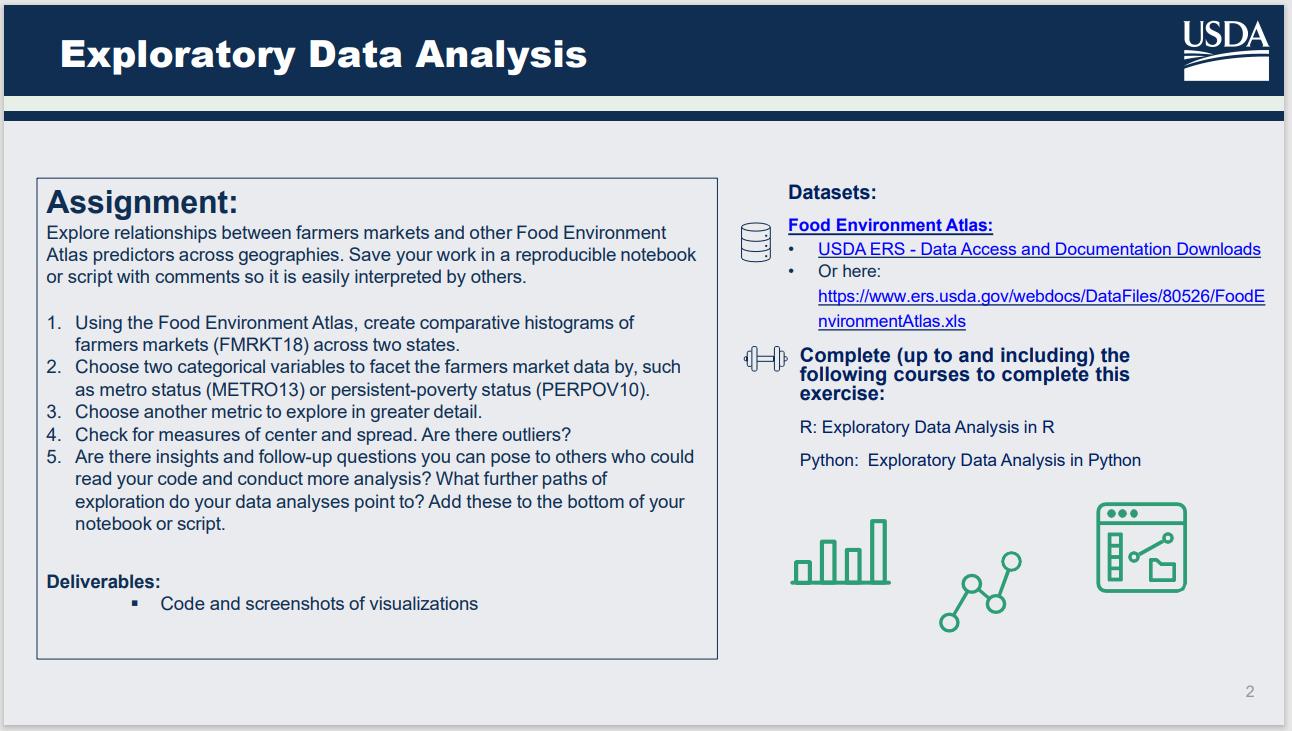

Note: There are state statistics referenced in Markdown cells in this notebook that do not come from the dataset. They are used as quick guides, and should not be relied upon.

Keyboard Shortcuts

    a - new cell above
    b - new cell below
    m - make cell markdown
    d,d - delete cell
    Escape - exit cell
    Enter - enter cell

Resources: 

    https://pandas.pydata.org/docs/
    Geeks for Geeks
    Stack Overflow
    Statology
    SaturnCloud

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # https://seaborn.pydata.org/

## Import the data

In [2]:
# If you have errors using pd.read_excel try running the following line of code:
#!pip install xlrd 

In [3]:
# Use the url listed in the problem statement to create a filename path variable

FEA_url = 'https://www.ers.usda.gov/webdocs/DataFiles/80526/FoodEnvironmentAtlas.xls'

In [4]:
# Read excel file

dfs = pd.read_excel(FEA_url, sheet_name=None)

In [5]:
## view a list of the dictionary keys which are the names of the sheets in our excel file

dfs.keys()

dict_keys(['Read_Me', ' Variable List', 'Supplemental Data - County', 'Supplemental Data - State', 'ACCESS', 'STORES', 'RESTAURANTS', 'ASSISTANCE', 'INSECURITY', 'TAXES', 'LOCAL', 'HEALTH', 'SOCIOECONOMIC'])

In [6]:
## View an example of the 'variable list' sheet
dfs[' Variable List']

,Category Name,Category Code,Subcategory Name,Variable Name,Variable Code,Geography,Units
0,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store, 2010",LACCESS_POP10,CNTY10,Count
1,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store, 2015",LACCESS_POP15,CNTY10,Count
2,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store (% change), 20...",PCH_LACCESS_POP_10_15,CNTY10,% change
3,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store (%), 2010",PCT_LACCESS_POP10,CNTY10,Percent
4,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store (%), 2015",PCT_LACCESS_POP15,CNTY10,Percent
...,...,...,...,...,...,...,...
276,Socioeconomic Characteristics,SOCIOECONOMIC,Income Level,"Persistent-poverty counties, 2010",PERPOV10,CNTY10,Legend
277,Socioeconomic Characteristics,SOCIOECONOMIC,Income Level,"Child poverty rate, 2015",CHILDPOVRATE15,CNTY10,Percent
278,Socioeconomic Characteristics,SOCIOECONOMIC,Income Level,"Persistent-child-poverty counties, 2010",PERCHLDPOV10,CNTY10,Legend
279,Socioeconomic Characteristics,SOCIOECONOMIC,Other,"Metro/nonmetro counties, 2010",METRO13,CNTY10,Legend


## 1) Create Histograms

### Using the Food Environment Atlas, create comparative histograms of farmers markets (FMRKT18) across two states.

In [7]:
## Find the sheet that contains the variable(s) of interest
# Sheet name is in Category Code
dfs[' Variable List'][dfs[' Variable List']['Variable Code']=='FMRKT18']

,Category Name,Category Code,Subcategory Name,Variable Name,Variable Code,Geography,Units
172,Local Foods,LOCAL,Farmers' Markets,"Farmers' markets, 2018",FMRKT18,CNTY10,Count


In [8]:
# By comparing the output above with the dictionary keys, we know that the sheet and corresponding dataframe is 'LOCAL'
# create a copy of the Local sheet for the first exercise
# df = df.copy() # then do the steps this avoids setting with copy warning

df101 = dfs['LOCAL'].copy()

In [9]:
# view the dataframe
df101

,FIPS,State,County,DIRSALES_FARMS07,DIRSALES_FARMS12,PCH_DIRSALES_FARMS_07_12,PCT_LOCLFARM07,PCT_LOCLFARM12,PCT_LOCLSALE07,PCT_LOCLSALE12,...,CSA12,PCH_CSA_07_12,AGRITRSM_OPS07,AGRITRSM_OPS12,PCH_AGRITRSM_OPS_07_12,AGRITRSM_RCT07,AGRITRSM_RCT12,PCH_AGRITRSM_RCT_07_12,FARM_TO_SCHOOL13,FARM_TO_SCHOOL15
0,1001.0,AL,Autauga,25.0,51.0,104.000000,6.024096,13.110540,0.596374,1.554692,...,3.0,50.000000,7.0,10.0,42.857143,228000.0,146000.0,-35.964912,NaN,0.0
1,1003.0,AL,Baldwin,80.0,103.0,28.750000,7.023705,10.414560,0.712634,0.478010,...,7.0,-46.153846,18.0,16.0,-11.111111,124000.0,204000.0,64.516129,0.000000,1.0
2,1005.0,AL,Barbour,18.0,13.0,-27.777778,2.889246,2.276708,0.015403,0.012457,...,0.0,-100.000000,27.0,32.0,18.518519,163000.0,304000.0,86.503067,1.000000,0.0
3,1007.0,AL,Bibb,12.0,13.0,8.333333,5.687204,6.878307,NaN,NaN,...,3.0,50.000000,5.0,6.0,20.000000,NaN,21000.0,NaN,0.000000,0.0
4,1009.0,AL,Blount,84.0,88.0,4.761905,5.940594,7.091056,0.267717,0.277792,...,4.0,-42.857143,10.0,8.0,-20.000000,293000.0,30000.0,-89.761092,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139,56039.0,WY,Teton,4.0,11.0,175.000000,2.222222,7.142857,0.021817,0.265604,...,0.0,NaN,5.0,12.0,140.000000,1614000.0,NaN,NaN,0.000000,0.0
3140,56041.0,WY,Uinta,13.0,24.0,84.615385,3.779070,7.619048,NaN,0.445308,...,0.0,-100.000000,5.0,9.0,80.000000,105000.0,NaN,NaN,0.000000,0.0
3141,56043.0,WY,Washakie,25.0,5.0,-80.000000,11.682243,2.392344,0.154231,NaN,...,1.0,NaN,8.0,6.0,-25.000000,70000.0,62000.0,-11.428571,0.000000,0.0
3142,56045.0,WY,Weston,15.0,3.0,-80.000000,6.329114,1.136364,NaN,NaN,...,0.0,NaN,14.0,9.0,-35.714286,147000.0,71000.0,-51.700680,0.000000,0.0


In [10]:
#df101.columns

In [11]:
dfs[' Variable List'][dfs[' Variable List']['Variable Code']=='FMRKTPTH18']

,Category Name,Category Code,Subcategory Name,Variable Name,Variable Code,Geography,Units
175,Local Foods,LOCAL,Farmers' Markets,"Farmers' markets/1,000 pop, 2018",FMRKTPTH18,CNTY10,"# per 1,000 pop"


In [12]:
## Subset the dataframe to variables of interest for exercise 1
df101 = df101[['FIPS','State','County','FMRKT18','FMRKTPTH18', 'FMRKT_SNAP18']]
## Drop null records
df101 = df101.dropna()
df101

,FIPS,State,County,FMRKT18,FMRKTPTH18,FMRKT_SNAP18
0,1001.0,AL,Autauga,1.0,0.017985,0.0
1,1003.0,AL,Baldwin,4.0,0.018347,0.0
2,1005.0,AL,Barbour,4.0,0.160765,2.0
3,1007.0,AL,Bibb,1.0,0.044643,0.0
4,1009.0,AL,Blount,1.0,0.017289,0.0
...,...,...,...,...,...,...
3138,56037.0,WY,Sweetwater,2.0,0.046457,0.0
3139,56039.0,WY,Teton,3.0,0.129977,1.0
3140,56041.0,WY,Uinta,2.0,0.098527,0.0
3141,56043.0,WY,Washakie,2.0,0.253646,0.0


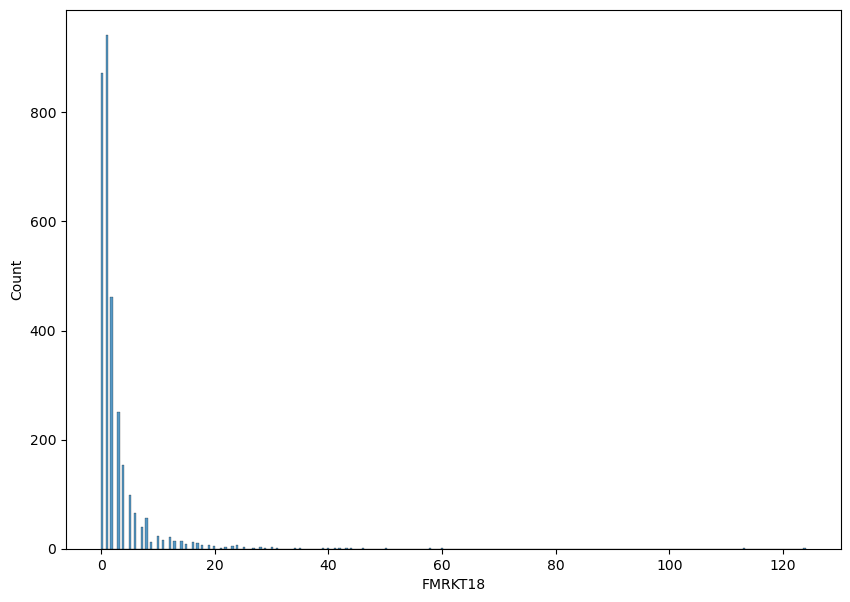

In [13]:
# Histogram of number of Farmers markets by county across the U.S.
# X-axis, number of Farmers markets in that county
# Y-axis, number of counties that have that number of Farmers markets
plt.figure(figsize=(10, 7))
plots = sns.histplot(data=df101, x='FMRKT18')
plt.show()

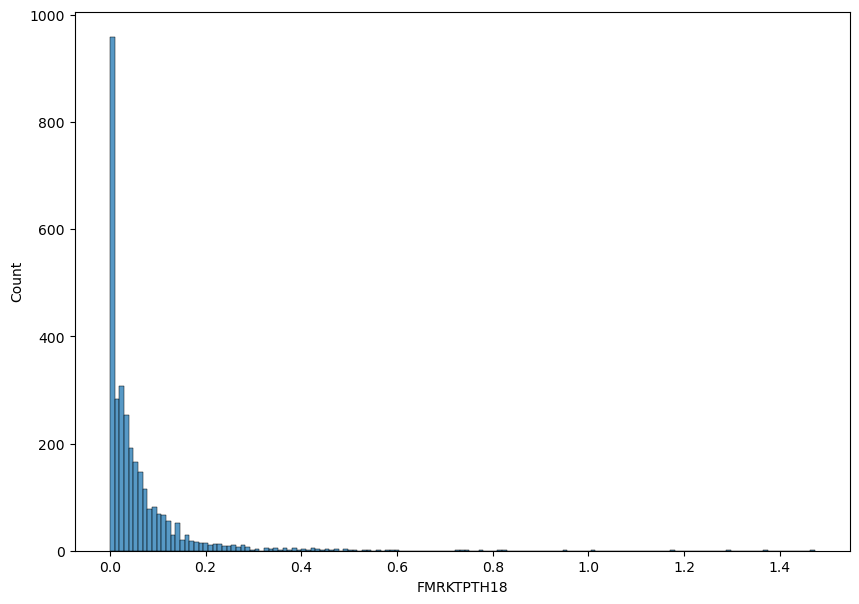

In [14]:
# Compare to the histogram of the per-capita number of Farmer's Markets (per 1k pop)
plt.figure(figsize=(10, 7))
plots = sns.histplot(data=df101, x='FMRKTPTH18')
plt.show()

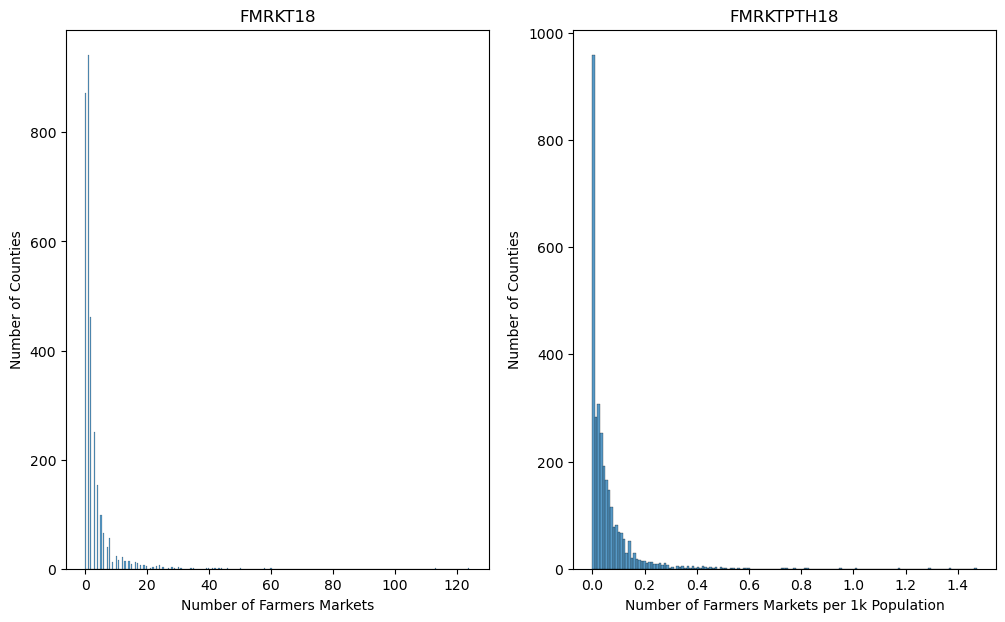

In [15]:
## combine both histograms into one figure

fig, ax = plt.subplots(1, 2, figsize=(12, 7), gridspec_kw={'width_ratios': [.5, .5]})

ax[0].set_title('FMRKT18')
ax[0].set_xlabel('Number of Farmers Markets')
ax[0].set_ylabel('Number of Counties')
sns.histplot(data=df101, x='FMRKT18', ax=ax[0])

ax[1].set_title('FMRKTPTH18')
ax[1].set_xlabel('Number of Farmers Markets per 1k Population')
ax[1].set_ylabel('Number of Counties')
sns.histplot(data=df101, x='FMRKTPTH18', ax=ax[1])

plt.show()

### Compare two states

What states did/will you pick?

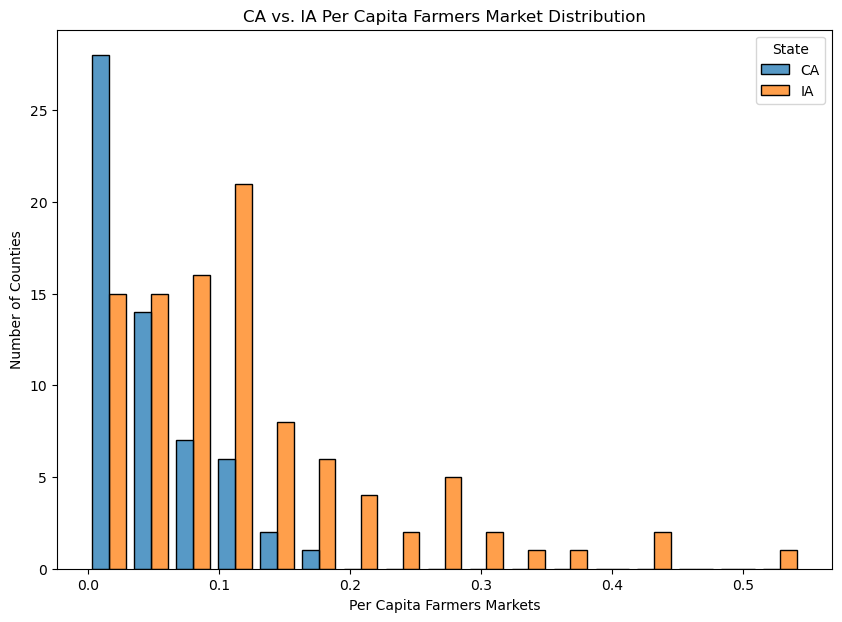

In [16]:
## Compare California and Iowa

plt.figure(figsize=(10, 7))

p1 = sns.histplot(data=df101[df101['State'].isin(['CA','IA'])], x="FMRKTPTH18", hue="State", multiple="dodge", shrink=.8)

p1.set_xlabel('Per Capita Farmers Markets')
p1.set_ylabel('Number of Counties')
p1.set_title('CA vs. IA Per Capita Farmers Market Distribution')

plt.show()

Iowa has a population of 3.19 million
California has a population of 39.54 million

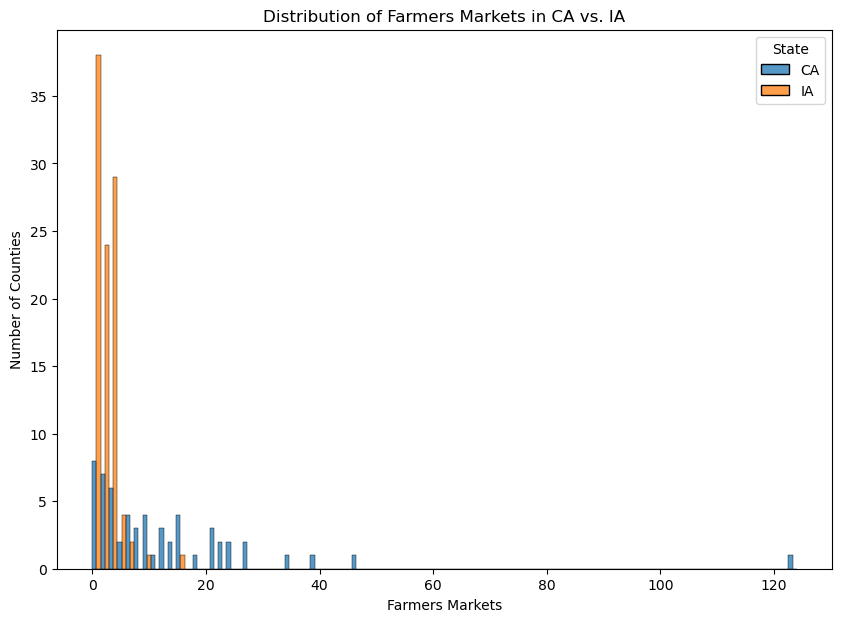

In [17]:
## Compare the total number of Farmers Markets
plt.figure(figsize=(10, 7))
p2 = sns.histplot(data=df101[df101['State'].isin(['CA','IA'])], x="FMRKT18", hue="State", multiple="dodge")
p2.set_xlabel('Farmers Markets')
p2.set_ylabel('Number of Counties')
p2.set_title('Distribution of Farmers Markets in CA vs. IA')
plt.show()

There are 58 counties in California and 99 counties in Iowa

In [18]:
## Separate California and Iowa
## Sort data by the number of farmers markets
df101_st = df101[df101['State'].isin(['CA','IA'])].sort_values(by=['FMRKT18'],ascending=False)

In [19]:
# run descriptive stats on the count of farmers markets
df101_st[['FMRKT18']].describe().T

,count,mean,std,min,25%,50%,75%,max
FMRKT18,157.0,6.267516,12.230365,0.0,1.0,3.0,5.0,124.0


Note the difference between the mean and the median (50%). When the data has a "long tail", has outliers, and is "ratio," median may be a more accurate description of the central tendency of the data. But, you audience may be more familiar with mean than median.

In [20]:
## Take a look at some of the highest counties
df101_st[df101_st['FMRKT18']>=10]

,FIPS,State,County,FMRKT18,FMRKTPTH18,FMRKT_SNAP18
204,6037.0,CA,Los Angeles,124.0,0.012271,53.0
222,6073.0,CA,San Diego,46.0,0.013759,16.0
228,6085.0,CA,Santa Clara,39.0,0.020128,24.0
186,6001.0,CA,Alameda,34.0,0.020399,24.0
223,6075.0,CA,San Francisco,28.0,0.031699,22.0
219,6067.0,CA,Sacramento,27.0,0.017521,7.0
192,6013.0,CA,Contra Costa,25.0,0.021735,18.0
234,6097.0,CA,Sonoma,25.0,0.050006,17.0
215,6059.0,CA,Orange,23.0,0.007219,9.0
226,6081.0,CA,San Mateo,23.0,0.029888,13.0


Population Estimates, July 1, 2022, (V2022) 9,721,138
https://www.census.gov/quickfacts/fact/table/losangelescountycalifornia/PST045222 

## 2) Select Two Categorical Variables

### Choose two categorical variables to facet the farmers market data by, such as metro status (METRO13) or persistent-poverty status (PERPOV10)

In [21]:
# Identify the Sheets that contain the variable(s) of interest 
# Sheet name is in Category Code
dfs[' Variable List'][dfs[' Variable List']['Variable Code'].isin(['METRO13','PERPOV10','POVRATE15','MEDHHINC15','PERCHLDPOV10'])]

,Category Name,Category Code,Subcategory Name,Variable Name,Variable Code,Geography,Units
274,Socioeconomic Characteristics,SOCIOECONOMIC,Income Level,"Median household income, 2015",MEDHHINC15,CNTY10,Dollars
275,Socioeconomic Characteristics,SOCIOECONOMIC,Income Level,"Poverty rate, 2015",POVRATE15,CNTY10,Percent
276,Socioeconomic Characteristics,SOCIOECONOMIC,Income Level,"Persistent-poverty counties, 2010",PERPOV10,CNTY10,Legend
278,Socioeconomic Characteristics,SOCIOECONOMIC,Income Level,"Persistent-child-poverty counties, 2010",PERCHLDPOV10,CNTY10,Legend
279,Socioeconomic Characteristics,SOCIOECONOMIC,Other,"Metro/nonmetro counties, 2010",METRO13,CNTY10,Legend


In [22]:
## By referenece the dictionary keys we created above we now know that the sheet and corresponding dataframe is 'LOCAL'
## create a copy 
df102 = dfs['SOCIOECONOMIC'].copy()
df102

,FIPS,State,County,PCT_NHWHITE10,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,PERPOV10,CHILDPOVRATE15,PERCHLDPOV10,METRO13,POPLOSS10
0,1001,AL,Autauga,77.246156,17.582599,2.400542,0.855766,0.397647,0.040314,11.995382,26.777959,56580.0,12.7,0,18.8,0,1,0.0
1,1003,AL,Baldwin,83.504787,9.308425,4.384824,0.735193,0.628755,0.043343,16.771185,22.987408,52387.0,12.9,0,19.6,0,1,0.0
2,1005,AL,Barbour,46.753105,46.691190,5.051535,0.389700,0.218524,0.087409,14.236807,21.906982,31433.0,32.0,1,45.2,1,0,0.0
3,1007,AL,Bibb,75.020729,21.924504,1.771765,0.096007,0.279293,0.030548,12.681650,22.696923,40767.0,22.2,0,29.3,1,1,0.0
4,1009,AL,Blount,88.887338,1.263040,8.070200,0.200621,0.497191,0.031402,14.722096,24.608353,50487.0,14.7,0,22.2,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56037,WY,Sweetwater,80.883897,0.947359,15.269598,0.739625,0.723645,0.093594,8.316212,27.094462,71867.0,8.5,0,10.2,0,0,0.0
3139,56039,WY,Teton,82.206255,0.150277,14.985442,1.070724,0.356908,0.061050,9.852541,19.141542,83290.0,6.6,0,7.6,0,0,0.0
3140,56041,WY,Uinta,88.531111,0.227294,8.783976,0.279383,0.582442,0.161000,8.873946,30.168577,62968.0,9.8,0,11.9,0,0,0.0
3141,56043,WY,Washakie,83.886089,0.257823,13.617719,0.539084,0.597680,0.011719,17.672565,25.454119,56088.0,11.2,0,15.7,0,0,0.0


In [23]:
## Combine the variables of interest to the farmers market data
df103 = pd.merge(df101, df102[['FIPS','METRO13','PERPOV10','POVRATE15','MEDHHINC15','PERCHLDPOV10']], how='left', on='FIPS')

Using shape to check the merge

In [24]:
## Double Check the new dataframe shape compared to the original
print('Farmers Market Dataframe Shape: ', df101.shape)
print('Combined Dataframe Shape: ', df103.shape)
print('Combined DF Columns: ', df103.columns)
print()
df103.head()

Farmers Market Dataframe Shape:  (3140, 6)
Combined Dataframe Shape:  (3140, 11)
Combined DF Columns:  Index(['FIPS', 'State', 'County', 'FMRKT18', 'FMRKTPTH18', 'FMRKT_SNAP18',
       'METRO13', 'PERPOV10', 'POVRATE15', 'MEDHHINC15', 'PERCHLDPOV10'],
      dtype='object')



,FIPS,State,County,FMRKT18,FMRKTPTH18,FMRKT_SNAP18,METRO13,PERPOV10,POVRATE15,MEDHHINC15,PERCHLDPOV10
0,1001.0,AL,Autauga,1.0,0.017985,0.0,1,0,12.7,56580.0,0
1,1003.0,AL,Baldwin,4.0,0.018347,0.0,1,0,12.9,52387.0,0
2,1005.0,AL,Barbour,4.0,0.160765,2.0,0,1,32.0,31433.0,1
3,1007.0,AL,Bibb,1.0,0.044643,0.0,1,0,22.2,40767.0,1
4,1009.0,AL,Blount,1.0,0.017289,0.0,1,0,14.7,50487.0,0


In [25]:
# Metro/Non-Metro and Persistant Poverty are categorical variables at the county level
# if we run descriptive stats we can use the mean stat to tell us the proportion of counties in each category
df103[['METRO13','PERPOV10']].describe().T

,count,mean,std,min,25%,50%,75%,max
METRO13,3140.0,0.371338,0.483239,0.0,0.0,0.0,1.0,1.0
PERPOV10,3140.0,0.111783,0.315150,0.0,0.0,0.0,0.0,1.0


Note Min and Max are 0 and 1, could use .unique() to confirm what values exist in this field

In [26]:
## What percent of US counties are Metro
metro_count = df103['METRO13'].sum() ## total number of metro counties
total_count = df103['County'].count() ## total number of counties
non_metro_count = total_count - metro_count ## total number of non-metro counties
print('Metro Counties:', metro_count, '- Non-Metro Counties:', non_metro_count, '- Total Number of Counties:', total_count)
print('Metro counties are %.2f' % (metro_count/total_count*100), 'percent of all counties') #print('%.12f' % a)

Metro Counties: 1166 - Non-Metro Counties: 1974 - Total Number of Counties: 3140
Metro counties are 37.13 percent of all counties


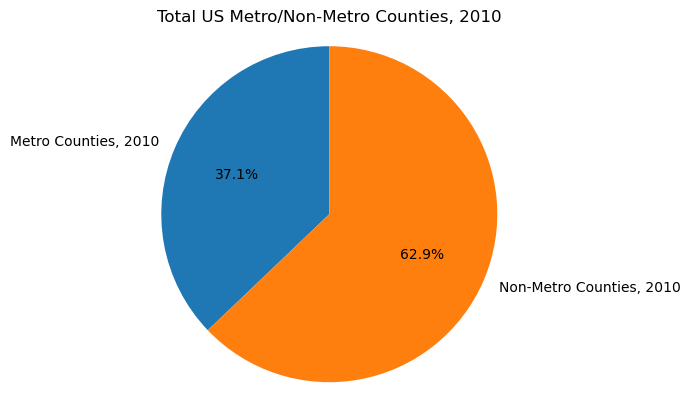

In [27]:
## Display the above in a pie chart
labels = 'Metro Counties, 2010', 'Non-Metro Counties, 2010'

sizes = [metro_count, non_metro_count]

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Total US Metro/Non-Metro Counties, 2010')
plt.show()

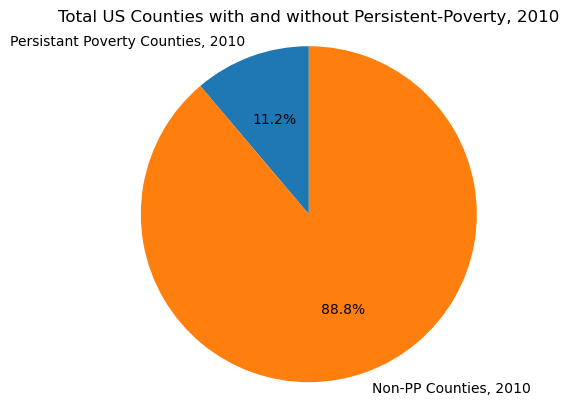

In [28]:
## Reproduce for Persistant Poverty
labels = 'Persistant Poverty Counties, 2010', 'Non-PP Counties, 2010'
p1 = df103['PERPOV10'].sum() ##sum the counties with persistent-poverty
p2 = df103['County'].count()-p1 ## count of total counties - persistent-poverty counties

sizes = [p1, p2]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Total US Counties with and without Persistent-Poverty, 2010')
plt.show()

In [29]:
## Lets look at our two example counties and check our base size for the assignment question
print(df103[df103['State'].isin(['CA','IA'])].groupby(['State'])['FIPS'].count())
print(df103[df103['State'].isin(['CA','IA'])].groupby(['State','METRO13','PERPOV10','PERCHLDPOV10'])['FIPS'].count().T)

State
CA    58
IA    99
Name: FIPS, dtype: int64
State  METRO13  PERPOV10  PERCHLDPOV10
CA     0        0         0               21
       1        0         0               32
                          1                5
IA     0        0         0               77
                          1                1
       1        0         0               21
Name: FIPS, dtype: int64


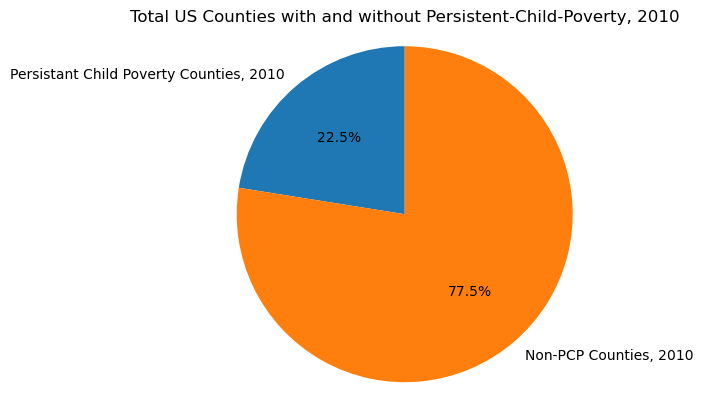

In [30]:
## Reproduce for Persistant Poverty
labels = 'Persistant Child Poverty Counties, 2010', 'Non-PCP Counties, 2010'
p1 = df103['PERCHLDPOV10'].sum() ##sum the counties with persistent-poverty
p2 = df103['County'].count()-p1 ## count of total counties - persistent-child-poverty counties

sizes = [p1, p2]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Total US Counties with and without Persistent-Child-Poverty, 2010')
plt.show()

Neither California nor Iowa had counties with persistent poverty in 2010, but they do have counties with persistent child poverty

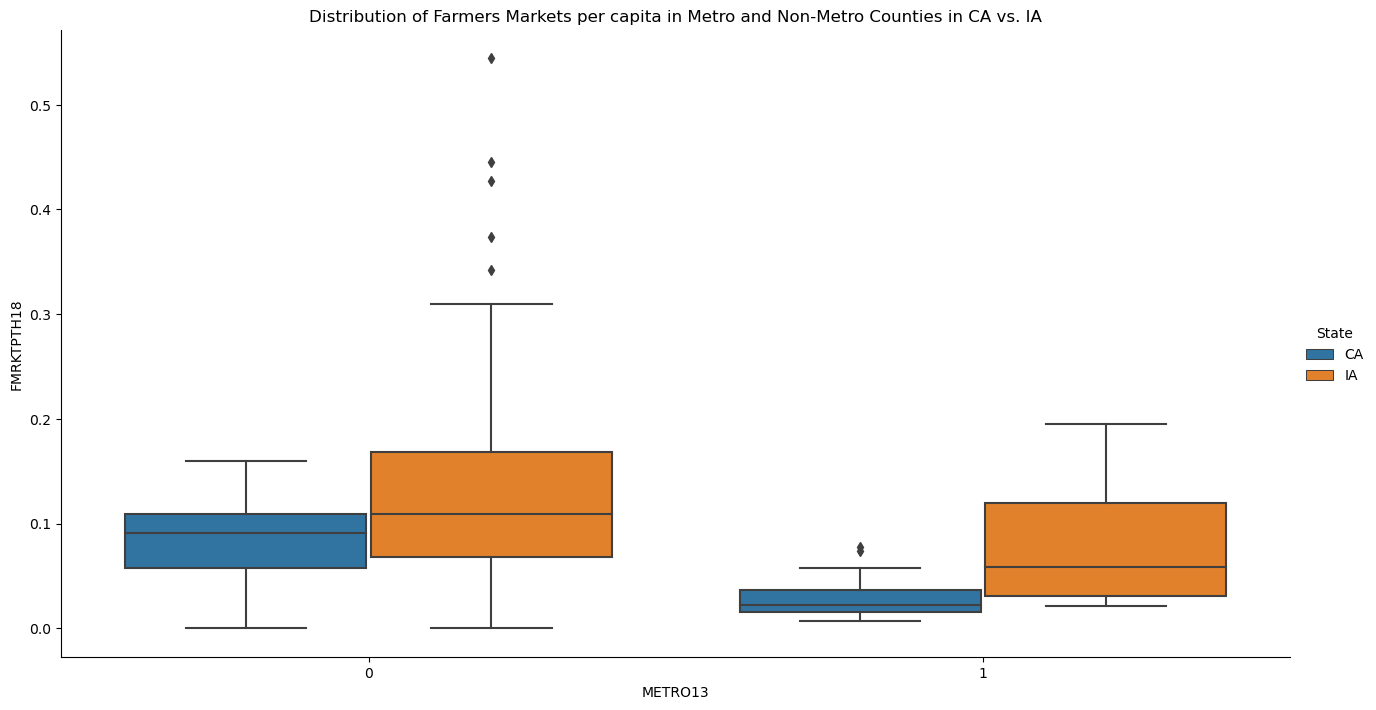

In [31]:
## Lets evaluate the distribution of farmers markets per capita by Metro Status
sns.catplot(data=df103[df103['State'].isin(['CA','IA'])], x="METRO13", y="FMRKTPTH18", hue='State',kind="box", height=7, aspect=15/8)
plt.title('Distribution of Farmers Markets per capita in Metro and Non-Metro Counties in CA vs. IA')
plt.show()

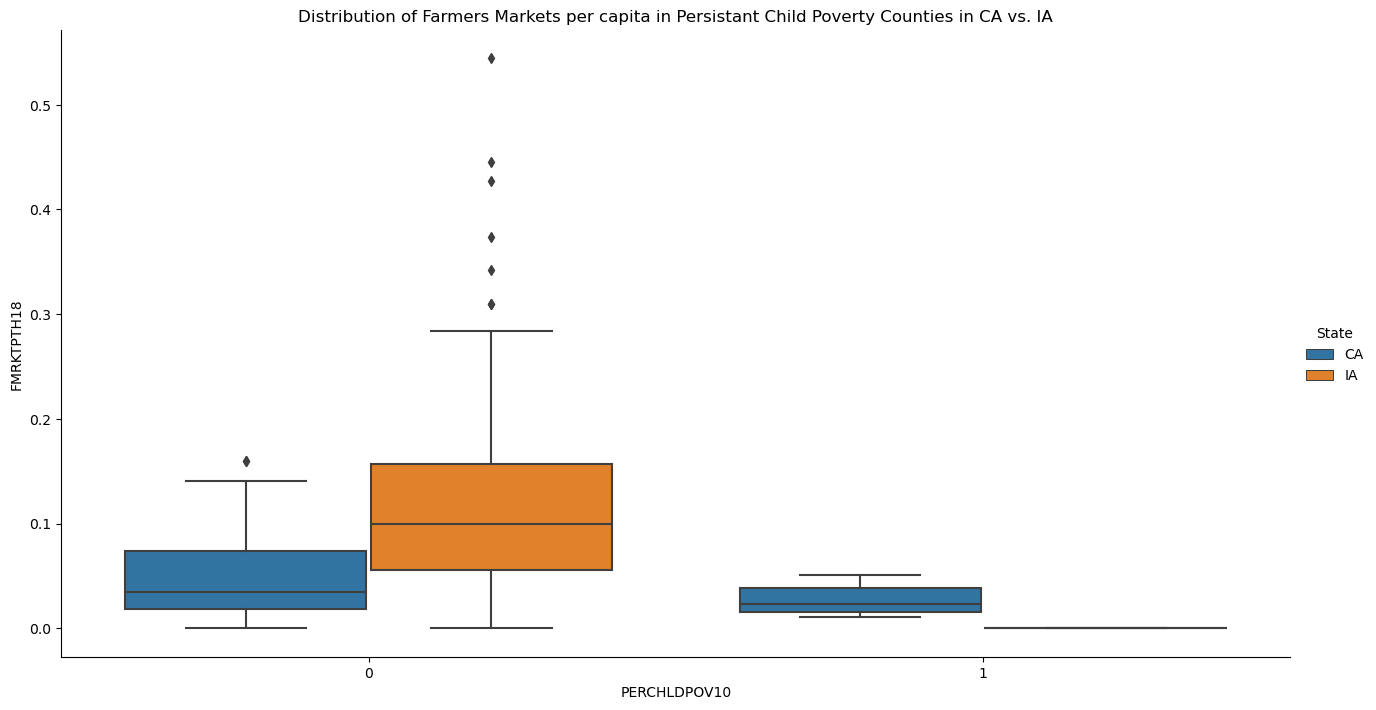

In [32]:
## Reproduce for Persistant Child Poverty Counties
sns.catplot(data=df103[df103['State'].isin(['CA','IA'])], x="PERCHLDPOV10", y="FMRKTPTH18", hue='State',kind="box", height=7, aspect=15/8)
plt.title('Distribution of Farmers Markets per capita in Persistant Child Poverty Counties in CA vs. IA')
plt.show()

## 3) Select Two Categorical Variables

### Choose another metric to explore in greater detail.

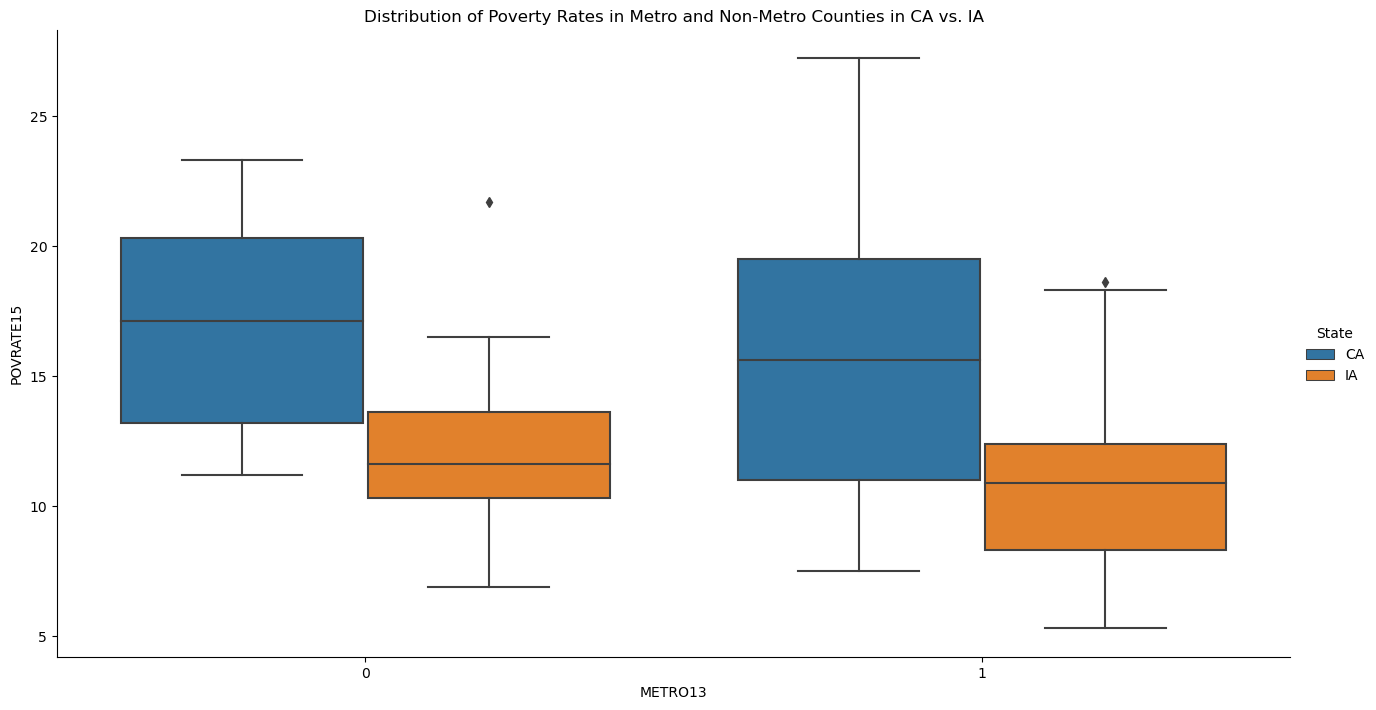

In [33]:
## Lets evaluate the distribution of poverty rates by Metro Status
sns.catplot(data=df103[df103['State'].isin(['CA','IA'])], x="METRO13", y="POVRATE15", hue='State',kind="box", height=7, aspect=15/8)
plt.title('Distribution of Poverty Rates in Metro and Non-Metro Counties in CA vs. IA')
plt.show()

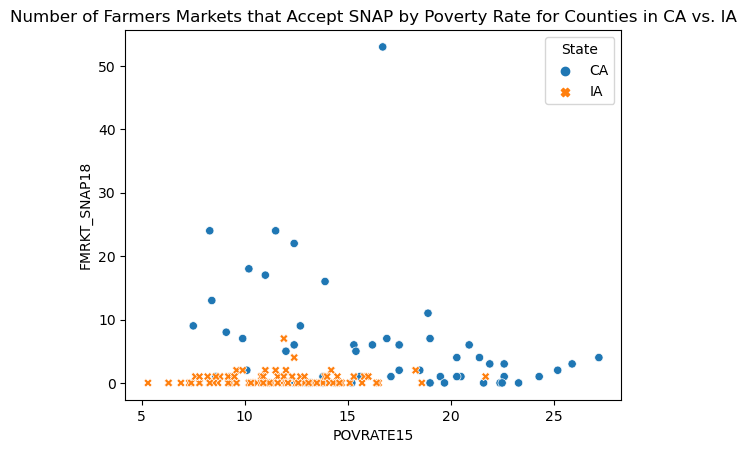

In [34]:
sns.scatterplot(data=df103[df103['State'].isin(['CA','IA'])], x="POVRATE15", y="FMRKT_SNAP18", hue="State", style="State")
plt.title('Number of Farmers Markets that Accept SNAP by Poverty Rate for Counties in CA vs. IA')
plt.show()

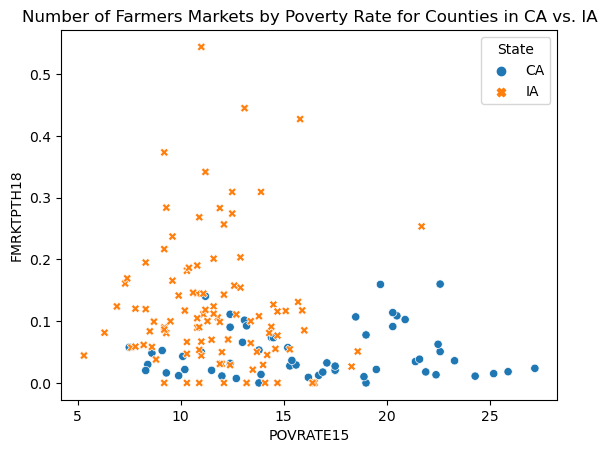

In [35]:
sns.scatterplot(data=df103[df103['State'].isin(['CA','IA'])], x="POVRATE15", y="FMRKTPTH18", hue="State", style="State")
plt.title('Number of Farmers Markets by Poverty Rate for Counties in CA vs. IA')
plt.show()

Discrete Ratio data - floor effect and large difference between count and percapita data

In [36]:
# Remove Los Angeles
sum((df103['State'].isin(['CA','IA'])) & (df103['FMRKT18']<100))

156

Our filter seems to be working. 
CA    58
IA    99

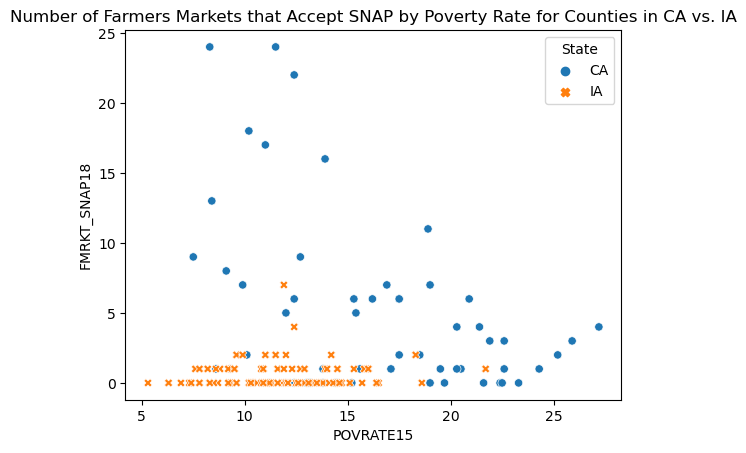

In [37]:
# repeat above graphs without LA
sns.scatterplot(data=df103[(df103['State'].isin(['CA','IA'])) & (df103['FMRKT18']<100)], x="POVRATE15", y="FMRKT_SNAP18", hue="State", style="State")
plt.title('Number of Farmers Markets that Accept SNAP by Poverty Rate for Counties in CA vs. IA')
plt.show()


exploratory analysis is just the beginning, could perform regression here

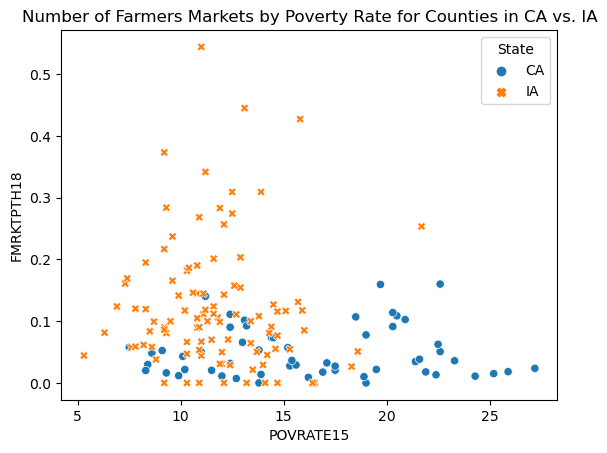

In [38]:
# repeat above graphs without LA
sns.scatterplot(data=df103[(df103['State'].isin(['CA','IA'])) & (df103['FMRKT18']<100)], x="POVRATE15", y="FMRKTPTH18", hue="State", style="State")
plt.title('Number of Farmers Markets by Poverty Rate for Counties in CA vs. IA')
plt.show()


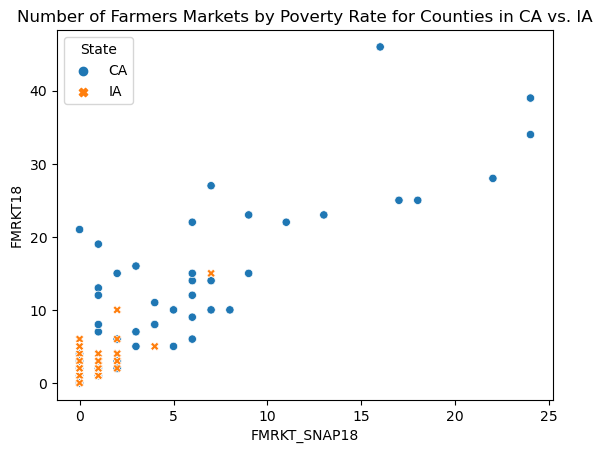

In [39]:
# repeat above graphs without LA
sns.scatterplot(data=df103[(df103['State'].isin(['CA','IA'])) & (df103['FMRKT18']<100)], x="FMRKT_SNAP18", y="FMRKT18", hue="State", style="State")
plt.title('Number of Farmers Markets by Poverty Rate for Counties in CA vs. IA')
plt.show()

In [40]:
# Create new column to calculate the percent of farmers markets in a county that accept SNAP
df103['PCT_FMRKT_SNAP18'] = df103['FMRKT_SNAP18'] / df103['FMRKT18']

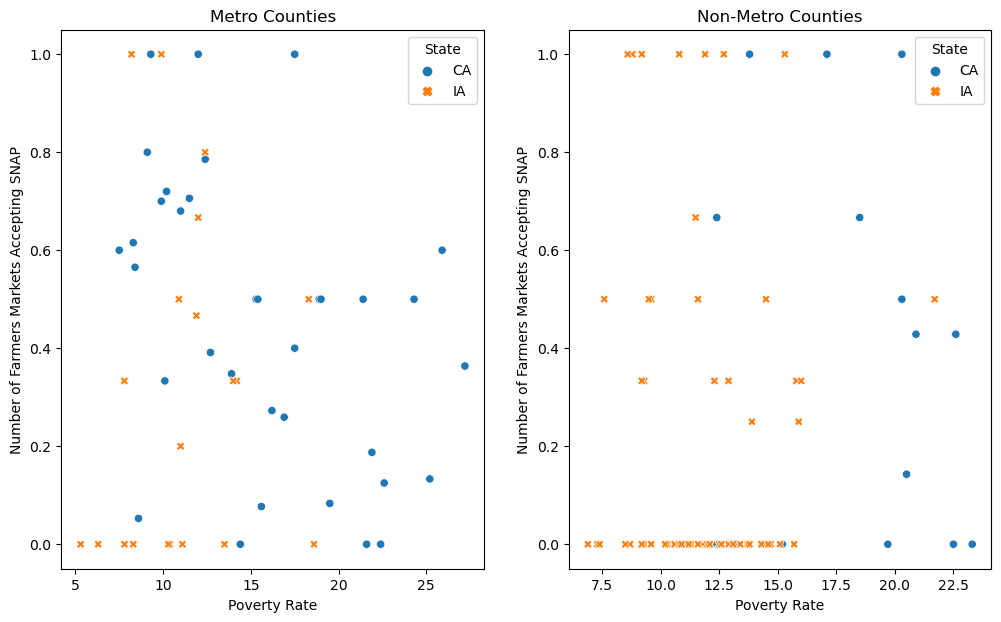

In [41]:
# make side be side graph "POVRATE15", y="FMRKT18" for metro and non-metro
# repeat above graphs without LA

fig, ax = plt.subplots(1, 2, figsize=(12, 7), gridspec_kw={'width_ratios': [.5, .5]})

ax[0].set_title('Metro Counties')
ax[0].set_xlabel('Poverty Rate')
ax[0].set_ylabel('Number of Farmers Markets Accepting SNAP')
sns.scatterplot(data=df103[(df103['State'].isin(['CA','IA'])) & (df103['FMRKT18']<100) & (df103["METRO13"] == 1)], x="POVRATE15", y="PCT_FMRKT_SNAP18", hue="State", style="State", ax=ax[0])


ax[1].set_title('Non-Metro Counties')
ax[1].set_xlabel('Poverty Rate')
ax[1].set_ylabel('Number of Farmers Markets Accepting SNAP')
sns.scatterplot(data=df103[(df103['State'].isin(['CA','IA'])) & (df103['FMRKT18']<100) & (df103["METRO13"] == 0)], x="POVRATE15", y="PCT_FMRKT_SNAP18", hue="State", style="State", ax=ax[1])


plt.show()

make x-axes equal

many options for exploring

## 4) Check for measures of center and spread. Are there outliers?


In [42]:
## Review the data avaliable
df103.head()

,FIPS,State,County,FMRKT18,FMRKTPTH18,FMRKT_SNAP18,METRO13,PERPOV10,POVRATE15,MEDHHINC15,PERCHLDPOV10,PCT_FMRKT_SNAP18
0,1001.0,AL,Autauga,1.0,0.017985,0.0,1,0,12.7,56580.0,0,0.0
1,1003.0,AL,Baldwin,4.0,0.018347,0.0,1,0,12.9,52387.0,0,0.0
2,1005.0,AL,Barbour,4.0,0.160765,2.0,0,1,32.0,31433.0,1,0.5
3,1007.0,AL,Bibb,1.0,0.044643,0.0,1,0,22.2,40767.0,1,0.0
4,1009.0,AL,Blount,1.0,0.017289,0.0,1,0,14.7,50487.0,0,0.0


In [43]:
## Lets look at our last Variable - Median HH Income
df103['MEDHHINC15'].describe()

count      3139.000000
mean      48611.206117
std       12351.988288
min       22894.000000
25%       40438.000000
50%       46807.000000
75%       54164.000000
max      125900.000000
Name: MEDHHINC15, dtype: float64

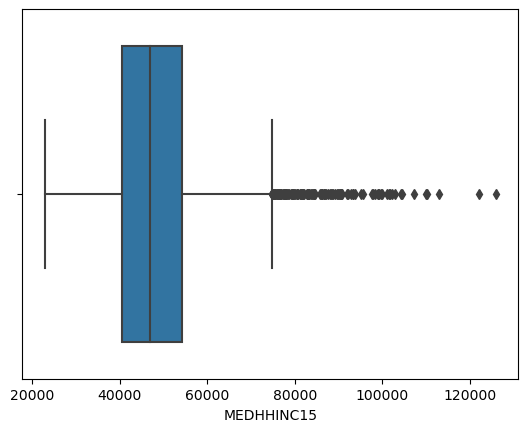

In [44]:
## Looks like there might be some outliers according to the histogram
## View a boxplot to visualize the IQR and Potential Outliers
sns.boxplot(x=df103['MEDHHINC15'])
plt.show()

 So looks like we may have some High Outliers, but we can't just cut off 25% of our data 
 so we will use a common IQR Based outlier identification method
 Compute the Inter-Quartile Range
 
 
 https://www.statology.org/find-outliers-with-iqr/#:~:text=The%20interquartile%20range%2C%20often%20abbreviated%20IQR%2C%20is%20the,IQR%20or%201.5%20times%20less%20than%20the%20IQR. 
 
 https://discovery.cs.illinois.edu/learn/Exploratory-Data-Analysis/Quartiles-and-Box-Plots/ 

"The interquartile range, often abbreviated IQR, is the difference between the 25th percentile (Q1) and the 75th percentile (Q3) in a dataset. It measures the spread of the middle 50% of values.

One popular method is to declare an observation to be an outlier if it has a value 1.5 times greater than the IQR or 1.5 times less than the IQR."

In [45]:

percentile25 = df103['MEDHHINC15'].quantile(0.25)
percentile75 = df103['MEDHHINC15'].quantile(0.75)
iqr = percentile75 - percentile25

In [46]:
## Compute your IQR Limits
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [47]:
## Find Outliers based on IQR Proximity
df103[df103['MEDHHINC15'] > upper_limit]
#df103[df103['MEDHHINC15'] < lower_limit]

,FIPS,State,County,FMRKT18,FMRKTPTH18,FMRKT_SNAP18,METRO13,PERPOV10,POVRATE15,MEDHHINC15,PERCHLDPOV10,PCT_FMRKT_SNAP18
68,2016.0,AK,Aleutians West,1.0,0.174734,0.0,0,0,8.5,80695.0,0,0.000000
69,2020.0,AK,Anchorage,10.0,0.034301,5.0,1,0,8.7,77791.0,0,0.500000
77,2110.0,AK,Juneau,2.0,0.062280,0.0,0,0,8.0,82892.0,0,0.000000
82,2170.0,AK,Matanuska-Susitna,7.0,0.065050,0.0,1,0,9.8,76601.0,0,0.000000
185,6001.0,CA,Alameda,34.0,0.020399,24.0,1,0,11.5,81462.0,0,0.705882
...,...,...,...,...,...,...,...,...,...,...,...,...
3090,55089.0,WI,Ozaukee,3.0,0.033652,1.0,1,0,5.2,80135.0,0,0.333333
3112,55133.0,WI,Waukesha,12.0,0.029771,3.0,1,0,4.7,78689.0,0,0.250000
3119,56005.0,WY,Campbell,1.0,0.021673,0.0,0,0,7.5,83042.0,0,0.000000
3134,56035.0,WY,Sublette,1.0,0.101906,0.0,0,0,6.1,77581.0,0,0.000000


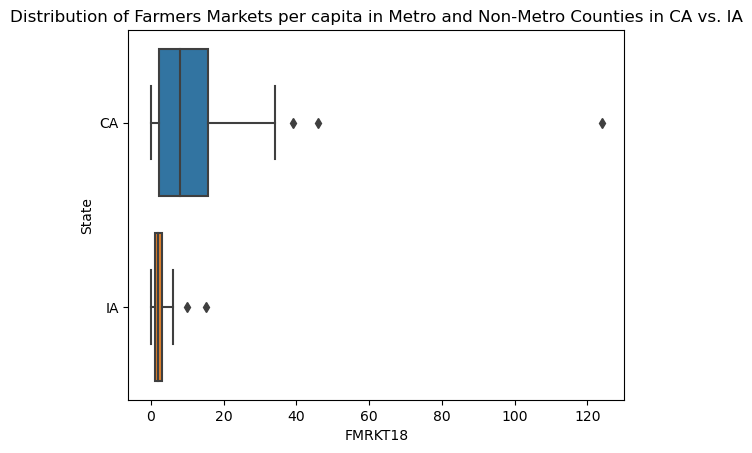

In [48]:
## Lets evaluate the distribution of farmers markets per capita by Metro Status
sns.boxplot(data=df103[df103['State'].isin(['CA','IA'])], x="FMRKT18", y='State')
plt.title('Distribution of Farmers Markets per capita in Metro and Non-Metro Counties in CA vs. IA')
plt.show()

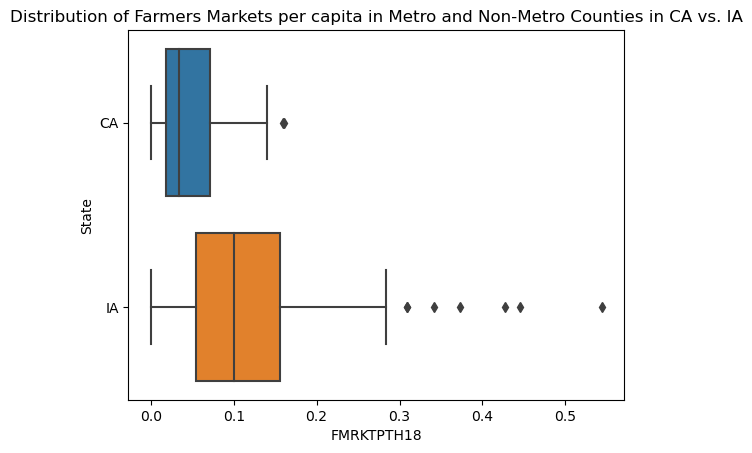

In [49]:
## Lets evaluate the distribution of farmers markets per capita by Metro Status
sns.boxplot(data=df103[ (df103['State'].isin(['CA','IA']))], x="FMRKTPTH18", y='State')
plt.title('Distribution of Farmers Markets per capita in Metro and Non-Metro Counties in CA vs. IA')
plt.show()

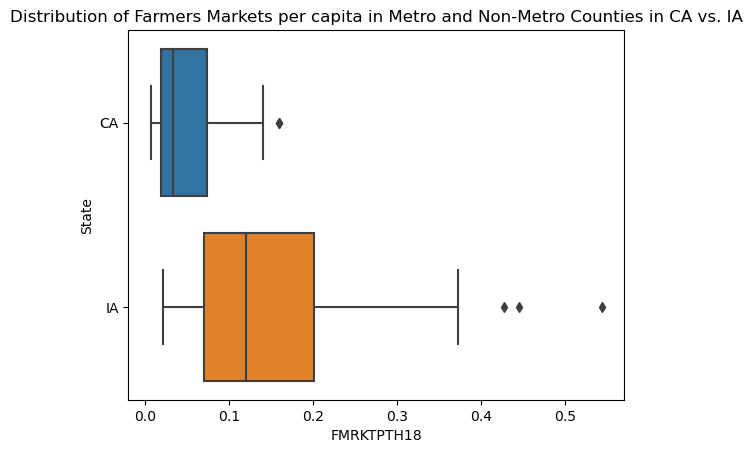

In [50]:
## Lets evaluate the distribution of farmers markets per capita by Metro Status
sns.boxplot(data=df103[ (df103['State'].isin(['CA','IA'])) & (df103["FMRKT18"]>1)], x="FMRKTPTH18", y='State')
plt.title('Distribution of Farmers Markets per capita in Metro and Non-Metro Counties in CA vs. IA')
plt.show()

There are multiple approaches to identifying and treating outliers. Here I showed a univariate approach. There are also multivariate approaches. What you choose will be dependent on your project, data, and analysis goals

## 5) Insights and Future Analysis

## Are there insights and follow-up questions you can pose to others who could read your code and conduct more analysis? What further pathers of exploration do your data analyses point to? Add these to the bottom of your notebook or script.

Further investigate the influence of poverty rates on Farmers Markets that accept SNAP. There seems to be a cuttoff at pverty rate >15% where Farmers Markets stop accepting SNAP. 
- Run regression analysis on number of Farmers markets accepting SNAP vs poverty rates
- Perform hypothesis test, number of Farmers markets accepting SNAP in counties above and below 15% poverty rate 
- Check requirements for a Farmers market to accept SNAP. Is it difficult or expensive?
- Investigate relationship between persistent poverty and persistent child poverty

Describe missing data before dropping it

Extra code for aligning axis limits

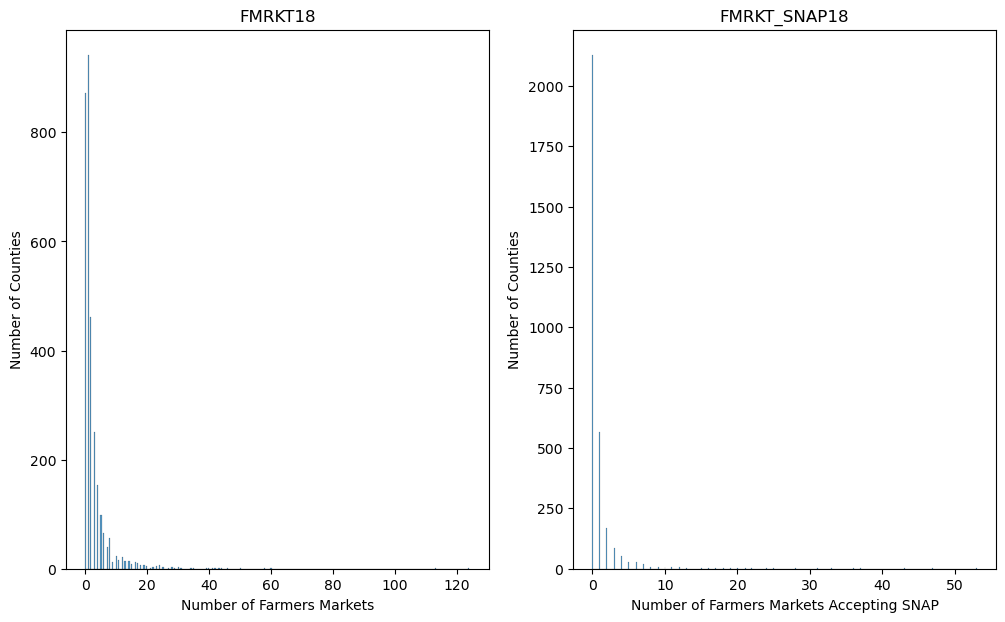

In [51]:
# combine both histograms into one figure

fig, ax = plt.subplots(1, 2, figsize=(12, 7), gridspec_kw={'width_ratios': [.5, .5]})

ax[0].set_title('FMRKT18')
ax[0].set_xlabel('Number of Farmers Markets')
ax[0].set_ylabel('Number of Counties')
sns.histplot(data=df101, x='FMRKT18', ax=ax[0])

ax[1].set_title('FMRKT_SNAP18')
ax[1].set_xlabel('Number of Farmers Markets Accepting SNAP')
ax[1].set_ylabel('Number of Counties')
sns.histplot(data=df101, x='FMRKT_SNAP18', ax=ax[1])

plt.show()

A good practice when presenting multiple graphs (and when your goal is to compare between the graphs) is to keep your axis limits the same for all graphs.

In [52]:
# Check x-limit

print('Max Count Farmers Markets: ', df101['FMRKT18'].max())
print('Max Count Farmers Markets Accepting SNAP: ', df101['FMRKT_SNAP18'].max())

Max Count Farmers Markets:  124.0
Max Count Farmers Markets Accepting SNAP:  53.0


In [53]:
# Check y-limit

no_SNAP = df101['FMRKT_SNAP18'] == 0  # identify records where FMRKT_SNAP18 is zero
df101.loc[no_SNAP,'FMRKT_SNAP18'].count()

2127

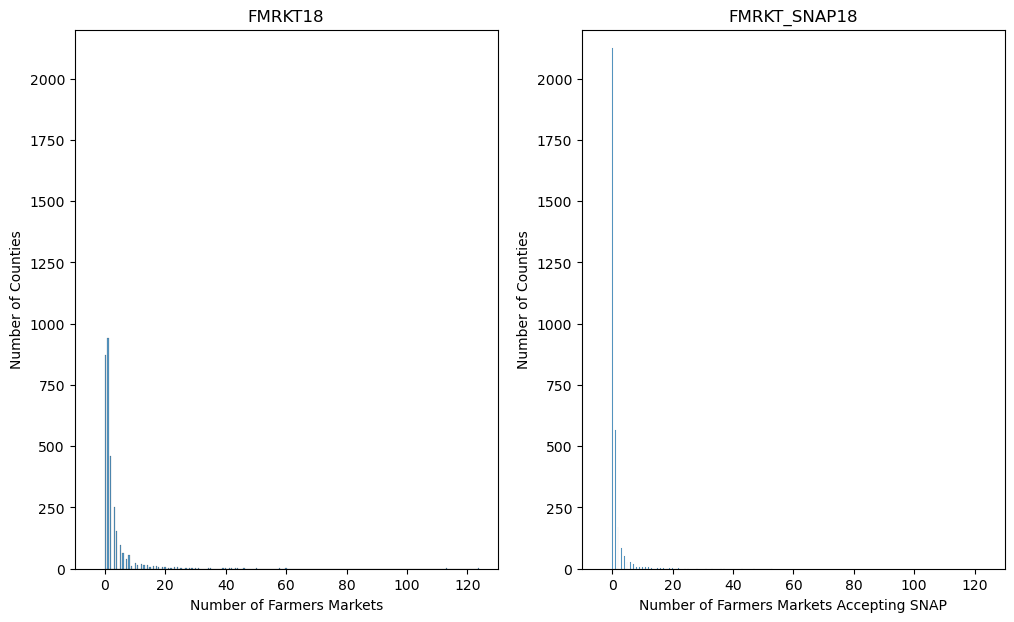

In [54]:
# Make the axis limits match

fig, ax = plt.subplots(1, 2, figsize=(12, 7), gridspec_kw={'width_ratios': [.5, .5]})

ax[0].set_title('FMRKT18')
ax[0].set_xlabel('Number of Farmers Markets')
ax[0].set_ylabel('Number of Counties')
ax[0].set_xlim(-10, 130)
ax[0].set_ylim(0, 2200)
sns.histplot(data=df101, x='FMRKT18', ax=ax[0])

ax[1].set_title('FMRKT_SNAP18')
ax[1].set_xlabel('Number of Farmers Markets Accepting SNAP')
ax[1].set_ylabel('Number of Counties')
ax[1].set_xlim(-10, 130)
ax[1].set_ylim(0, 2200)
sns.histplot(data=df101, x='FMRKT_SNAP18', ax=ax[1])

plt.show()